In [12]:

import tweepy
from tweepy import StreamListener
from tweepy import Stream
import time
import pandas as pd
import json
import numpy as np

"""
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
"""

'\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n'

In [4]:
'''class CustomStreamListener(StreamListener):

    def on_status(self, status): 
        print( status.author.screen_name, status.created_at, status.text)
        with open('file.txt', 'w') as f: 
                f.write('Author,Date,Text')
                
                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))


    def on_error(self, status_code):
        print ( sys.stderr, 'Encountered error with status code:', status_code)
        return True # Don't kill the stream

    def on_timeout(self):
        print ( sys.stderr, 'Timeout...')
        return True # Don't kill the stream




streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())
streamingAPI.filter(track=['NocheDeLosMuseos'])
'''

"class CustomStreamListener(StreamListener):\n\n    def on_status(self, status): \n        print( status.author.screen_name, status.created_at, status.text)\n        with open('file.txt', 'w') as f: \n                f.write('Author,Date,Text')\n                \n                f.write(str(status.author.screen_name)+str( status.created_at)+str( status.text))\n\n\n    def on_error(self, status_code):\n        print ( sys.stderr, 'Encountered error with status code:', status_code)\n        return True # Don't kill the stream\n\n    def on_timeout(self):\n        print ( sys.stderr, 'Timeout...')\n        return True # Don't kill the stream\n\n\n\n\nstreamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener())\nstreamingAPI.filter(track=['NocheDeLosMuseos'])\n"

In [2]:
"""
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="LaNocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))
"""

'\ndata={}\ni=0\n\nfor tweet in tweepy.Cursor(api.search,q="LaNocheDeLosMuseos",n=5).items(): \n    #print(tweet.author.screen_name, tweet.created_at,tweet.text)\n    #Archivo.write(str(tweet.author.screen_name)+\'//\'+str( tweet.created_at)+\'//\'+str(tweet.text)+\'\n\n\')\n    retweets=[]\n    for retweet in api.retweets(tweet.id):\n        retweets.append([retweet.user.id,tweet.author.id])\n    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),\n                         "texto":tweet.text,"retweets":retweets}\n    data[tweet.id]=datalinea\n    i+=1\n    print(i)\njson.dump(data,open(\'LaNocheDeLosMuseos2.json\', \'w\'))\n'

In [67]:
#json.dump(data,open('LaNocheDeLosMuseos2.json', 'w'))

In [ ]:
"""
data={}
i=0

for tweet in tweepy.Cursor(api.search,q="NocheDeLosMuseos",n=5).items(): 
    #print(tweet.author.screen_name, tweet.created_at,tweet.text)
    #Archivo.write(str(tweet.author.screen_name)+'//'+str( tweet.created_at)+'//'+str(tweet.text)+'\n\n')
    retweets=[]
    for retweet in api.retweets(tweet.id):
        retweets.append([retweet.user.id,tweet.author.id])
    datalinea={"autor":tweet.author.screen_name,"autorid":tweet.author.id,"fecha": str(tweet.created_at),
                         "texto":tweet.text,"retweets":retweets}
    data[tweet.id]=datalinea
    i+=1
    print(i)
json.dump(data,open('NocheDeLosMuseos2.json', 'w'))
"""

Para cada tweet vamos a levantar
Autor
Id Autor
Texto
Autores de los retweets
Autores de los me gusta
Autores de los comentarios
fecha


In [84]:
for idtweet in data:
    print(data[idtweet]["retweets"],data[idtweet]["autor"])

[] ViveroFacundo
[] campoadentro16
[] gungurfinearts
[] JcVazquez58
[] SmmMaris
[[3412844729, 281051064]] BCNArgentina
[] chortp
[] eneroman_nora
[] Indembarg
[] ConamMutual
[[376723885, 216106179], [1590956791, 216106179], [851309247887441920, 216106179], [745316089500999680, 216106179], [2714777790, 216106179]] CulturaNacionAR
[] manuelsilsan
[] eneroman_nora
[] miguelgracioso2
[] eneroman_nora
[] DONJULIO400
[] SebZabs
[] Angel4029F
[] karlof11
[] Silvanabanana2
[] silvinanoguera
[[3412844729, 281051064]] BCNArgentina
[] MuseoRoca
[] MuseoDecorativo
[] Adrian80596816
[] silvana_luvera
[] miki_kusanagi
[] Lolenico
[] eneroman_nora
[] C_COM_5
[] Lore__Marquez
[] Claudia65803029
[] sebakatz
[[166148237, 983458110827323393]] MuseoOriental
[] PeronistasUnidx
[] maferrari55
[] Indembarg
[] SmmMaris
[] beatrizbostera3
[] LSpoliansky
[] mamriverplate
[] sebakatz
[] comoalilive
[] sebakatz
[] eneroman_nora
[] Lore__Marquez
[[1250537521, 281051064]] BCNArgentina
[] RcA1_2Prensa
[] Arturo31674

In [85]:
print(data)

{'1062030927331819525': {'fecha': '2018-11-12 17:14:39', 'texto': 'RT @FlacoStereo: GUSTAVO CERATI | \n\nSu acta original de nacimiento, 11 de Agosto de 1959, exhibida en el Registro Civil de la ciudad de Bue…', 'retweets': [], 'autor': 'ViveroFacundo', 'autorid': 937742727806144514}, '1062033180528705540': {'fecha': '2018-11-12 17:23:36', 'texto': 'RT @MindefArg: El fin de semana vivimos #LaNocheDeLosMuseos junto a los Regimientos de Granaderos y de Patricios https://t.co/Z1XATaT01y', 'retweets': [], 'autor': 'campoadentro16', 'autorid': 743629350537408512}, '1062044514733383680': {'fecha': '2018-11-12 18:08:38', 'texto': '#LaNocheDeLosMuseos 🌙\n¡Gracias a todxs lxs que nos acompañaron el sábado!\nLa presentación a cargo de Güngur Arts fu… https://t.co/2zxou9gSlp', 'retweets': [], 'autor': 'gungurfinearts', 'autorid': 154285638}, '1062035136039006209': {'fecha': '2018-11-12 17:31:22', 'texto': 'RT @AgroindustriaAR: La historia, la música, la innovación y los sabores del campo argentin

## Grafo desde la cuenta NocheMuseos


In [5]:
def checkFollow(usa,usb):
    relation = api.show_friendship(source_id=usa, target_id=usb)
    if relation[0].following: #I'm not sure if it should be "target" or "source" here
        return True
    return False

In [ ]:
#archivo=open('redegodelosmuseos.txt', 'w')
i=0
cuenta="NocheMuseos"
followers = api.followers_ids(cuenta)
#friends = api.friends_ids(cuenta)
#nodos=[]
aristas=[]

#len(followers)
#for follower in followers: 
#    nodos.append(API.)


for nodo1 in followers:
    for nodo2 in followers:
        if nodo1 != nodo2:
            if checkFollow(nodo1,nodo2):
                nuevoenlace=[nodo1, nodo2]
                aristas.append(nuevoenlace)
                print(nuevoenlace)

#print(followers)
#for follower in followers:    
#    aristas.append(follower.screen_name) 
#
#    try:
#        followers1 = api.followers(follower.screen_name,n=1000)    # seguidores de cada amigo la noche de los museos
#    except:
#        print ('Fallo')
#        pass
#    for follower1 in followers1:
#        aristas.append(follower1.screen_name)


In [3]:
data={'enlaces':aristas}
json.dump(data,open('redegodelosmuseos.json', 'w'))

NameError: name 'aristas' is not defined

### Armar el grafo

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
with open("LaNocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [5]:
G=nx.Graph()
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[157437930, 739482054564413440]
[2395057795, 4377005313]
[912305527979479042, 4377005313]
[953963595066478592, 4377005313]
[3369177443, 4377005313]
[1430803063, 4377005313]
[3018976097, 4377005313]
[295723049, 4377005313]
[2495683128, 4377005313]
[756618670625923073, 4377005313]
[151252784, 4377005313]
[1078900124, 4377005313]
[241971407, 4377005313]
[977682030740819975, 259321971]
[806329022703632385, 259321971]
[1017047817435648002, 37494271]
[876807033336582149, 37494271]
[4540822335, 37494271]
[1020497948868825089, 37494271]
[365161396, 37494271]
[62406944, 37494271]
[1029389546201534466, 37494271]
[556481585, 37494271]
[218624582, 37494271]
[73250111, 37494271]
[201306629, 37494271]
[151311669, 37494271]
[2723524361, 37494271]
[357878296, 37494271]
[2943883450, 37494271]
[1058190209483988992, 37494271]
[2713036746, 37494271]
[45452139, 37494271]
[91943324, 37494271]
[2302051538, 4726332977]
[315864204, 216106179]
[95970921, 216106179]
[376723885, 216106179]
[905838625908289537, 37

[1918875967, 281051064]
[177586243, 281051064]
[839018437, 343016679]
[4643594723, 343016679]
[245455831, 343016679]
[2895174736, 4105102085]
[1444468644, 4105102085]
[3986669476, 70724306]
[632223073, 70724306]
[575470406, 70724306]
[1033050587733131264, 70724306]
[25601974, 70724306]
[91943324, 70724306]
[286320837, 70724306]
[708908895226437632, 70724306]
[258066263, 2576979296]
[95970921, 2576979296]
[1032795216787451911, 2372440289]
[1591227648, 2372440289]
[4846309631, 2372440289]
[723207155462094848, 2372440289]
[1588698530, 2372440289]
[787515846084136961, 2372440289]
[3147891377, 2372440289]
[3405554626, 2372440289]
[233282576, 2372440289]
[810611806150520836, 2372440289]
[414686155, 2372440289]
[904777495265902592, 2372440289]
[975038913306857472, 2372440289]
[4301775809, 2372440289]
[199978533, 2372440289]
[2372440289, 2372440289]
[2693534743, 2372440289]
[820090699672682496, 2372440289]
[1011312969936973826, 2372440289]
[980579121037303808, 780769846745194496]
[1905792302, 

[790709162, 123648741]
[95970921, 123648741]
[2866714078, 123648741]
[745316089500999680, 123648741]
[148843959, 123648741]
[959212342268571654, 2493150020]
[2266581895, 498288800]
[4800410356, 498288800]
[314257136, 498288800]
[4634579817, 83685403]
[2835398387, 83685403]
[2790344573, 83685403]
[538282759, 83685403]
[860541475330904065, 83685403]
[106620761, 83685403]
[40501547, 910992064803950593]
[177989662, 815044882075095040]
[977255150829129729, 815044882075095040]
[4540822335, 245455831]
[2353577888, 119154939]
[4222445547, 70724306]
[2274853140, 70724306]
[33350532, 70724306]
[2946859468, 70724306]
[371030651, 70724306]
[153977017, 70724306]
[1586898096, 216106179]
[376723885, 216106179]
[184680601, 747787930714914816]
[1508965039, 747787930714914816]
[1026882237382451202, 747787930714914816]
[2414263224, 747787930714914816]
[50141267, 136377424]
[76368994, 209678997]
[898389133499879428, 209678997]
[2404256483, 884834990651056134]
[796721709873295360, 884834990651056134]
[1986

[2866714078, 1737350311]
[1364568619, 177003746]
[2460052429, 584148959]
[144862065, 584148959]
[307672796, 584148959]
[636551690, 584148959]
[239356646, 584148959]
[757979928193359872, 584148959]
[1187256756, 584148959]
[549640543, 584148959]
[299356783, 584148959]
[271461760, 584148959]
[991587488, 584148959]
[18191631, 584148959]
[174418708, 584148959]
[476749918, 584148959]
[7520762, 584148959]
[3009285897, 584148959]
[2208088863, 584148959]
[91103160, 584148959]
[112844751, 584148959]
[1058116381638619136, 584148959]
[410756392, 160916877]
[556122578, 2178031070]
[1735730587, 2178031070]
[245455831, 2178031070]
[704746776490844166, 2178031070]
[26836588, 766202954]
[494957560, 766202954]
[138184898, 766202954]
[925816736947064833, 216106179]
[1022875984243122176, 216106179]
[720420816, 216106179]
[50089454, 216106179]
[218730557, 216106179]
[3246905751, 216106179]
[95970921, 216106179]
[2876651963, 216106179]
[1705539680, 900396192730943489]
[177586243, 900396192730943489]
[956016

[791635303, 584938981]
[525441968, 114582574]
[36734729, 114582574]
[4019257102, 114582574]
[751929335490174980, 114582574]
[2395057795, 114582574]
[2841547690, 114582574]
[1057324857413775360, 114582574]
[295723049, 114582574]
[791758832, 114582574]
[265534073, 114582574]
[151252784, 114582574]
[623408331, 114582574]
[113162871, 114582574]
[148000720, 114582574]
[889564117580881920, 114582574]
[883499135348944896, 37494271]
[455939903, 37494271]
[3826661056, 37494271]
[4687617019, 37494271]
[4540822335, 37494271]
[1046790869259571201, 37494271]
[1047284218705973248, 37494271]
[2274853140, 37494271]
[361401417, 37494271]
[954566096, 37494271]
[39067846, 37494271]
[481231680, 37494271]
[893911335599263745, 37494271]
[633410587, 37494271]
[128398482, 37494271]
[1029389546201534466, 37494271]
[293603575, 37494271]
[2933765231, 58676777]
[153585575, 58676777]
[771438597740322816, 58676777]
[3986669476, 58676777]
[206709711, 58676777]
[3875981777, 58676777]
[1470181062, 58676777]
[67061585,

In [6]:
with open("NocheDeLosMuseos2.json",'r') as read:
    data=json.load(read)

In [7]:
j=0
for idtweet in data:
    if data[idtweet]["retweets"]==[]:
        j+=1

    for ret in (data[idtweet]["retweets"]):
        print(ret)
        G.add_edge(ret[0],ret[1])
print(j)

[812027012, 223472601]
[1035500422096723968, 223472601]
[116332905, 223472601]
[1024490176482107392, 223472601]
[54782408, 223472601]
[2970456022, 223472601]
[358585208, 223472601]
[221953093, 223472601]
[148811198, 223472601]
[72380224, 223472601]
[7748792, 223472601]
[707383707758403584, 438121206]
[296926582, 164368516]
[855444346115678209, 134856584]
[758703658691358721, 134856584]
[751601772452573184, 134856584]
[1155230606, 134856584]
[412585916, 134856584]
[132168336, 134856584]
[722855990333321217, 354323593]
[719587918147358720, 354323593]
[719952137908850688, 354323593]
[725403236778258434, 354323593]
[2826230897, 2863360053]
[593043522, 2863360053]
[704771175340249089, 104808290]
[112437266, 132547234]
[1012173408107421697, 132547234]
[103045284, 132547234]
[494215236, 132547234]
[557936424, 132547234]
[15813547, 132547234]
[14098101, 132547234]
[57440969, 132547234]
[78542637, 132547234]
[386660365, 132547234]
[370869182, 132547234]
[11456702, 132547234]
[102917693082066124

[284149678, 182644738]
[3090150781, 182644738]
[3083840063, 182644738]
[41284894, 182644738]
[4494714705, 182644738]
[281134100, 182644738]
[873930057986830336, 84751147]
[1730366389, 84751147]
[722595300, 2568205570]
[398433056, 2568205570]
[860946802664763392, 2568205570]
[2881261127, 2568205570]
[58676777, 2568205570]
[79367977, 2568205570]
[595040838, 2568205570]
[933109375530659840, 2568205570]
[608513007, 2568205570]
[1913974482, 2568205570]
[76082846, 2568205570]
[751929335490174980, 2568205570]
[1730366389, 2568205570]
[873930057986830336, 2568205570]
[370064721, 2568205570]
[750095843500449792, 2568205570]
[4914545380, 1679770705]
[517133984, 954566096]
[736992463, 2817658346]
[148000720, 2817658346]
[151252784, 2817658346]
[553039995, 2817658346]
[2985597903, 2238183656]
[2847611950, 2238183656]
[4036379481, 2238183656]
[149098745, 2238183656]
[885014612399316997, 1339207069]
[4298499995, 1339207069]
[1382978396, 1339207069]
[148000720, 1339207069]
[274222021, 1339207069]
[34

[346179894, 2752300754]
[263356595, 2238183656]
[3983639621, 2238183656]
[2573104218, 2238183656]
[722882263, 2238183656]
[337460914, 1698823405]
[703227725, 1698823405]
[883426011412606977, 1698823405]
[887518301601091585, 1698823405]
[749333713301938176, 1698823405]
[2369575280, 1698823405]
[162916850, 1698823405]
[1042392734, 1698823405]
[522145294, 1698823405]
[1568435334, 1698823405]
[1434683695, 1698823405]
[148000720, 1698823405]
[876841504584736768, 1698823405]
[509633050, 1698823405]
[1241560483, 1698823405]
[3782925087, 1698823405]
[4706858962, 1698823405]
[794936413, 1698823405]
[4042605466, 1698823405]
[4594387049, 1698823405]
[185718824, 584112631]
[921859070457458689, 2612062536]
[4702470386, 182644738]
[2294702125, 182644738]
[295407175, 182644738]
[559220442, 182644738]
[182085550, 182644738]
[74872455, 182644738]
[2160683364, 182644738]
[1024769036108881923, 182644738]
[175185277, 182644738]
[1058190209483988992, 182644738]
[892205772855291904, 182644738]
[997489027946

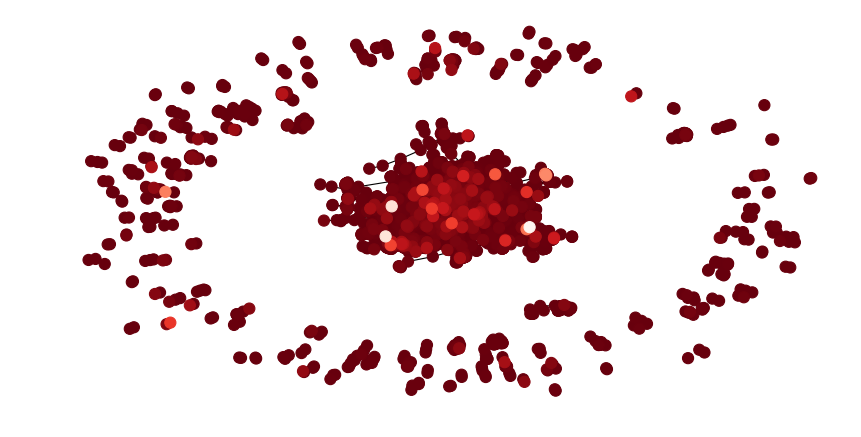

In [8]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(G, with_labels=False,node_size=100,
        node_color = sorted(list(dict(G.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

#nx.draw(G)
#plt.show()

In [12]:
print (nx.number_of_nodes(G),nx.number_of_edges(G))

4503 6133


In [9]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [20]:
# Tabla con las caraterísticas de las redes
info= pd.DataFrame({"ID":['LaNochedelosMuseos'],"nodos":Gc.number_of_nodes(),"enlaces":Gc.number_of_edges(),
                    "kmean":np.mean(list(dict(Gc.degree).values())),
                    "kmin":np.min(list(dict(Gc.degree).values())),
                    "kmax":np.max(list(dict(Gc.degree).values())),
                    "densidad":nx.density(Gc),"clusteringglobal":nx.transitivity(Gc),
                    "clusteringlocal":nx.average_clustering(Gc),"diametro":nx.diameter(Gc)})

In [21]:
info

,ID,clusteringglobal,clusteringlocal,densidad,diametro,enlaces,kmax,kmean,kmin,nodos
0,LaNochedelosMuseos,0.015552,0.052049,0.000743,14,5668,216,2.901459,1,3907


In [22]:
# Vrificando si la distribución es libre de escala

# Librería para crear contables
from collections import defaultdict

grados = defaultdict(int)                   # valor inicial es int: 0
for i in (list(dict(Gc.degree).values())): 
    grados[i]+=1                            # Para cada elemento de la lista el valor se incrementa en uno donde el grado es i
    gord = sorted(grados.items())     
    k, pk = np.array(gord).T                # Arma dos matrices con la misma dimension para el grafico.
                                            
    pk = [float(i) / sum(pk) for i in pk]   # Calculo de la probabilidad


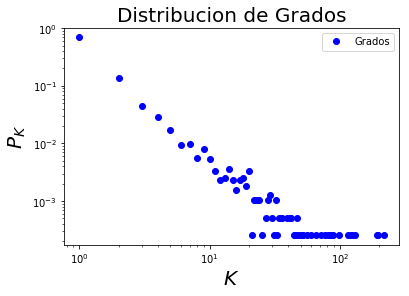

In [23]:
# Bineado lineal 

# Escala logartimica
plt.plot(k, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()

In [24]:
# Beneado Logaritmico para pk y k

# Para pk
grados = defaultdict(int)
j=1
while j<=(max((list(dict(Gc.degree).values())))):
    for i in (list(dict(Gc.degree).values())): 
        if i<=j and i>=j/2:
            grados[j]+=1        
    j=j*2        
gord = sorted(grados.items())    
k, pk = np.array(gord).T   
#print (pk,k)

pk = [i/float(j) for i,j in zip(pk,k)] #Aquí cambie a flotante porque me daba mal. Creo que por la version de python

# Para k
# Hace celdas equiespaciadas en escala logaritmica que dependen del grado
bins=[1]
s=1
j=1
for t in k[1:]:
    s=j+t/2  
    j=j+t
    bins.append(s)
print (bins,k)

([1, 2, 5, 11, 23, 47, 95, 191], array([  1,   2,   4,   8,  16,  32,  64, 128]))


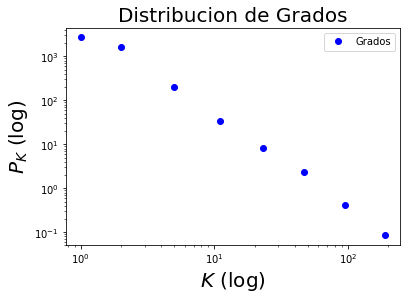

In [25]:
# Bineado logaritmico con escala lgaritmica en ambos ejes

plt.plot(bins, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$ (log)', fontsize = 20)
plt.ylabel('$P_K$ (log)', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()

In [18]:
# Exportar el grafo en formato adecuado para GEPHI
nx.write_gexf(Gc,'LaNochedelosMuseosCC.gexf')

In [24]:
#Bet=nx.betweenness_centrality(Gc, k=None, normalized=True, weight=None, endpoints=False, seed=None)
Grados=sorted(Bet,reverse=True,key=lambda x:Bet[x])
#print([data[i[0]]["autor"] for i in Grados[:10]])

for i in range(30):
    autor=api.get_user(Grados[i]).screen_name
    print (autor,Gc.degree(Grados[i]))

CulturaNacionAR 214
NocheMuseos 122
espacio_memoria 128
gcba 114
sebakatz 86
Adriveronica1 22
Exactas_UBA 83
ojovisor66 23
JuaNyP__ 86
mumimumi09 98
gendarmeria 81
batourplanner 24
MartaSinH83 14
nela_godoy 17
AbejaBlanca1303 4
FilmusDaniel 42
AySA_Oficial 32
EducacionAR 58
BancoCentral_AR 44
ciencia_ar 51
UCRCapital 38
Comunicacionucr 15
MuseoEvita 29
maumacrii 20
mercedesgm 19
dario_velez 16
LOLAMORA2005 12
fundacionTef_ar 26
AxelPino12 35
18Manifiesto 28


In [17]:
Bet=nx.betweenness_centrality(Gc, k=None, normalized=True, weight=None, endpoints=False, seed=None)

In [23]:
Grados=sorted(Bet,reverse=True,key=lambda x:Bet[x])
print(Bet[Grados[1]])

0.16659461443721527


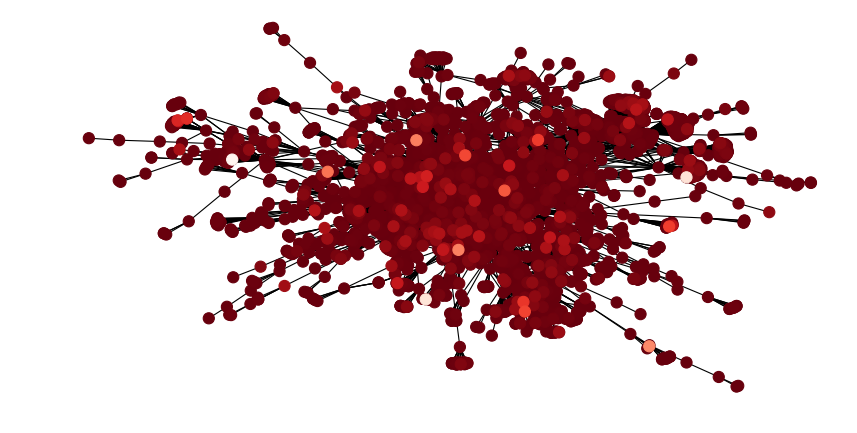

In [17]:
plt.figure(figsize=(10, 5), dpi=80)
nx.draw(Gc, with_labels=False,node_size=100,
        node_color = sorted(list(dict(Gc.degree()).values())),cmap=plt.cm.Reds_r)
plt.show()

In [ ]:
G=nx.Graph()
for arista in aristas:
        G.add_edge(arista[0],arista[1])

In [ ]:
"""
Tweter de algunos museos de la ciudad de buenos aires

1 Museo del cine @MuseoDelCineBA
2 Museo de la ciudad @MuseoCiudadGCBA
3 Museo de arte español @MuseoLarreta
4 Museo Historico Savedra @MuseoSaavedra
5 Museo Carlos Gardel @MuseoGardel
6 Museo de arte popular @MAPJH
7 Museo Isaac Fernández Blanco @museofernandezb
8 Museo de Arte MODERNO @modernoba
9 Museo Perlotti @MuseoPerlotti
10 Museo Artes Plásticas Eduardo Sívori @museo_sivori
11 Usina del Arte @UsinadelArte
12 Museo Evita @MuseoEvita
13 Bellas Artes @BellasArtesAR
14 Museo Mitre @MuseoMitre
15 MuseoArtDecorativoAR @MuseoDecorativo
16 Museo H. Sarmiento @MuseoSarmiento
17 Museo Histórico @MuseoHistorico
18 centro cultural borges @centroborges
19 Museo Bicentenario @MuseoOficial
20 Museo Casa Rosada @CasaRosada
21 Museo Libro y Lengua @MLibroLengua
22 Museo Histórico Nacional Cabildo Nacional @cabildonacional
23 Policía Federal Argentina @PFAOficial
24 Museo del Traje BA @museodeltrajeba
25 Museo BCRA  @BancoCentral_AR

"""